# Add Public Raster Dataset

In [1]:
import geoengine as ge
from datetime import datetime

## Initialize Geo Engine as Admin

In [2]:
ge.initialize("http://localhost:3030/api", admin_token="8aca8875-425a-4ef1-8ee6-cdfc62dd7525")

## List volumes

In [3]:
volumes = ge.volumes()
volumes

[Volume(name='test_data', path='test_data/')]

## Define metadata

In [4]:
file_path = "raster/landcover/landcover.tif" # specify file path relative to volume path

rasterband_channel = 1

origin = [-180.0, 90.0]
x_pixel_size = 0.1
y_pixel_size = -0.1
geo_transform = ge.api.GdalDatasetGeoTransform({
  "originCoordinate": origin, 
  "xPixelSize": x_pixel_size, 
  "yPixelSize": y_pixel_size
})

width = 3600
height = 1800

file_not_found_handling = ge.api.FileNotFoundHandling.NODATA

gdal_params = ge.api.GdalDatasetParameters({
  "filePath": file_path, 
  "rasterbandChannel": rasterband_channel, 
  "geoTransform": geo_transform,
  "width": width, 
  "height": height , 
  "fileNotFoundHandling": file_not_found_handling, 
  "noDataValue": None, 
  "propertiesMapping": None, 
  "gdalOpenOptions": None, 
  "gdalConfigOptions": None, 
  "allowAlphabandAsMask": True
})

result_descriptor_measurement = ge.ClassificationMeasurement(
        measurement = "Land Cover",
        classes = {
          "0": "Water Bodies",
          "1": "Evergreen Needleleaf Forests",
          "2": "Evergreen Broadleaf Forests",
          "3": "Deciduous Needleleaf Forests",
          "4": "Deciduous Broadleleaf Forests",
          "5": "Mixed Forests",
          "6": "Closed Shrublands",
          "7": "Open Shrublands",
          "8": "Woody Savannas",
          "9": "Savannas",
          "10": "Grasslands",
          "11": "Permanent Wtlands",
          "12": "Croplands",
          "13": "Urban and Built-Up",
          "14": "Cropland-Natural Vegetation Mosaics",
          "15": "Snow and Ice",
          "16": "Barren or Sparsely Vegetated"
        }

)



result_descriptor = ge.RasterResultDescriptor(
  "U8",
  result_descriptor_measurement,
  "EPSG:4326",
  spatial_bounds=ge.SpatialPartition2D(-180.0, -90.0, 180.0, 90.0),
  spatial_resolution=ge.SpatialResolution(0.1, 0.1)
)

meta_data = ge.api.GdalMetaDataStatic({
  "type": "GdalStatic",
  "time": None, 
  "params": gdal_params, 
  "resultDescriptor": result_descriptor
})

meta_data

{'type': 'GdalStatic',
 'time': None,
 'params': {'filePath': 'raster/landcover/landcover.tif',
  'rasterbandChannel': 1,
  'geoTransform': {'originCoordinate': [-180.0, 90.0],
   'xPixelSize': 0.1,
   'yPixelSize': -0.1},
  'width': 3600,
  'height': 1800,
  'fileNotFoundHandling': <FileNotFoundHandling.NODATA: 'NoData'>,
  'noDataValue': None,
  'propertiesMapping': None,
  'gdalOpenOptions': None,
  'gdalConfigOptions': None,
  'allowAlphabandAsMask': True},
 'resultDescriptor': Data type:         U8
 Spatial Reference: EPSG:4326
 Measurement:       Land Cover (0: Water Bodies, 1: Evergreen Needleleaf Forests, 2: Evergreen Broadleaf Forests, 3: Deciduous Needleleaf Forests, 4: Deciduous Broadleleaf Forests, 5: Mixed Forests, 6: Closed Shrublands, 7: Open Shrublands, 8: Woody Savannas, 9: Savannas, 10: Grasslands, 11: Permanent Wtlands, 12: Croplands, 13: Urban and Built-Up, 14: Cropland-Natural Vegetation Mosaics, 15: Snow and Ice, 16: Barren or Sparsely Vegetated)}

In [5]:
add_dataset_properties = ge.DatasetProperties( 
    name = "Land Cover",
    source_operator = "GdalSource",
    description = "Land Cover",
    symbology = ge.RasterSymbology(
      opacity = 1.0,
      colorizer = ge.LinearGradientColorizer(
        breakpoints=[
          ge.ColorBreakpoint(value=0, color=(0, 0, 255, 255)),
          ge.ColorBreakpoint(value=8, color=(0, 255, 0, 255)),
          ge.ColorBreakpoint(value=16, color=(255, 0, 0, 255))
        ],
        no_data_color= (0, 0, 0, 0),
        over_color= (0, 0, 0, 0),
        under_color= (0, 0, 0, 0)
      )
    ),
    provenance=[ge.Provenance(
      citation="The data was obtained from <https://lpdaac.usgs.gov/products/mcd12c1v006>. The layer Majority_Land_Cover_Type_1 was extracted, downscaled and saved as landcover.tif.",
      uri="https://lpdaac.usgs.gov/products/mcd12c1v006/",
      license="All data distributed by the LP DAAC contain no restrictions on the data reuse. (https://lpdaac.usgs.gov/resources/faqs/#am-i-allowed-to-reuse-lp-daac-data)."
    )],


)

add_dataset_properties.to_api_dict()

{'id': None,
 'name': 'Land Cover',
 'description': 'Land Cover',
 'sourceOperator': 'GdalSource',
 'symbology': {'type': 'raster',
  'colorizer': {'type': 'linearGradient',
   'breakpoints': [{'value': 0, 'color': (0, 0, 255, 255)},
    {'value': 8, 'color': (0, 255, 0, 255)},
    {'value': 16, 'color': (255, 0, 0, 255)}],
   'noDataColor': (0, 0, 0, 0),
   'overColor': (0, 0, 0, 0),
   'underColor': (0, 0, 0, 0)},
  'opacity': 1.0},
 'provenance': [{'citation': 'The data was obtained from <https://lpdaac.usgs.gov/products/mcd12c1v006>. The layer Majority_Land_Cover_Type_1 was extracted, downscaled and saved as landcover.tif.',
   'license': 'All data distributed by the LP DAAC contain no restrictions on the data reuse. (https://lpdaac.usgs.gov/resources/faqs/#am-i-allowed-to-reuse-lp-daac-data).',
   'uri': 'https://lpdaac.usgs.gov/products/mcd12c1v006/'}]}

## Add raster dataset to the first volume

In [6]:
volume = volumes[0]

dataset_id = ge.add_dataset(volumes[0], add_dataset_properties, meta_data)

dataset_id

a4829845-1853-4370-be25-bade6f2444d3

## Verify that data is accessible for user

In [7]:
ge.reset()
ge.initialize("http://localhost:3030/api")

workflow = ge.register_workflow({
    "type": "Raster",
    "operator": {
        "type": "GdalSource",
        "params": {
            "data": {
                "type": "internal",
                "datasetId": str(dataset_id)
            },
        }
    }
})

workflow.get_result_descriptor()

Data type:         U8
Spatial Reference: EPSG:4326
Measurement:       Land Cover (0: Water Bodies, 1: Evergreen Needleleaf Forests, 10: Grasslands, 11: Permanent Wtlands, 12: Croplands, 13: Urban and Built-Up, 14: Cropland-Natural Vegetation Mosaics, 15: Snow and Ice, 16: Barren or Sparsely Vegetated, 2: Evergreen Broadleaf Forests, 3: Deciduous Needleleaf Forests, 4: Deciduous Broadleleaf Forests, 5: Mixed Forests, 6: Closed Shrublands, 7: Open Shrublands, 8: Woody Savannas, 9: Savannas)

## Load the data

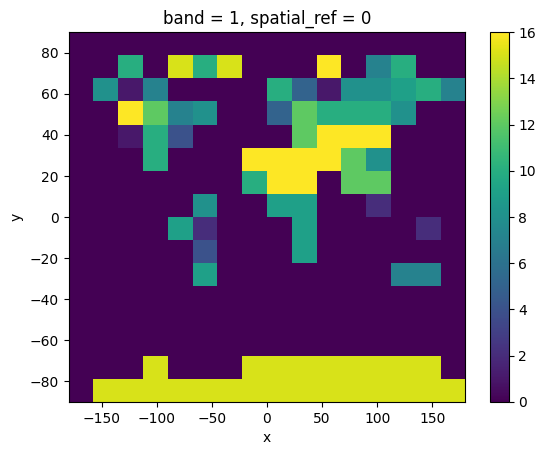

In [8]:
time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

data = workflow.get_xarray(
    ge.QueryRectangle(
        ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
        ge.TimeInterval(time, time),
        resolution=ge.SpatialResolution(360. / 16, 180. / 16),
        )
)

data.plot()

## Delete the dataset

In [9]:
ge.reset()
ge.initialize("http://localhost:3030/api", admin_token="8aca8875-425a-4ef1-8ee6-cdfc62dd7525")

ge.delete_dataset(dataset_id)

## Verify the dataset was deleted

In [10]:
try:
    data = workflow.get_xarray(
        ge.QueryRectangle(
            ge.BoundingBox2D(-180.0, -90.0, 180.0, 90.0),
            ge.TimeInterval(time, time),
            resolution=ge.SpatialResolution(360. / 16, 180. / 16),
        )
    )
except Exception as e:
    print(e)

{"error":"Operator","message":"Operator: LoadingInfoError: UnknownDatasetId"}
